### Details

This document contains the details of Task 2 for ICS2205. The task will be marked out of 100%, however it is equivalent to 10% of the total mark for this unit. <br> 
While discussions between individual students are considered as healthy, the final deliverable needs to be that produced by you and **not plagiarised** in any way. The **deadline** to submit this task is **12:00pm Monday 28th November 2022**.<br>
You need to compile your answer to the task described below in this same notebook. Then upload it, together with a duely filled plagiarism form, onto the appropriate space on the VLE. Deliverables submitted late will be penalised or may not be accepted.

### Interfacing NetworkX with Neo4j

Neo4j is an important graph platform and is more than a persistant storage for graph data. It provides graph algorithms that are scaleable and production-ready. In this task you will need to combine Neo4j with NetworkX. To do this you need to use the **nxneo4j** Python library.


Install the latest version of nxneo4j as follows:

In [1]:
pip install git+https://github.com/ybaktir/networkx-neo4j

  Cloning https://github.com/ybaktir/networkx-neo4j to /private/var/folders/mg/vn40sbzx67z7dh2p43tnmd1r0000gn/T/pip-req-build-vqmz1p5e
  Running command git clone --filter=blob:none --quiet https://github.com/ybaktir/networkx-neo4j /private/var/folders/mg/vn40sbzx67z7dh2p43tnmd1r0000gn/T/pip-req-build-vqmz1p5e
  Resolved https://github.com/ybaktir/networkx-neo4j to commit 97dc9563bf992ea9714cbdb99cb9e6a41c7cce65
  Preparing metadata (setup.py) ... done

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install networkx-neo4j


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


#### Connect to Neo4j

In [34]:
from neo4j import GraphDatabase, basic_auth

For this task you can use a [Neo4j blank sandbox](https://neo4j.com/sandbox/). Once the instance has started check the connection details tab to find the **Bolt URL** and the **password**. By default the user name is **neo4j**. Update the code below with the details to connect to Neo4j sandbox. You can also use the Neo4j desktop version.

In [27]:
graph = GraphDatabase.driver("bolt://localhost:7687", auth=basic_auth("neo4j","987654321"))

Access the Neo4j sandbox and inspect the database by openning it with the browser

In [35]:
%matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [36]:
# Define CSV URLs
csv_urls = [
    "https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-book1-edges.csv",
    "https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-book2-edges.csv",
    "https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-book3-edges.csv",
    "https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-book45-edges.csv"
]

# Create a directed graph
G = nx.Graph()

# Load data into NetworkX graph
for book, url in enumerate(csv_urls, start=1):
    df = pd.read_csv(url)
    for _, row in df.iterrows():
        G.add_node(row['Source'])
        G.add_node(row['Target'])
        G.add_edge(row['Source'], row['Target'], weight=int(row['weight']), book=book)


#### Analyse the Game of Thrones dataset

nxneo4j contains a number of built-in datasets. One of these datasets is build around the popular TV series of Game of Thrones. The dataset is based around that created by [Andrew Beveridge](https://networkofthrones.wordpress.com/) and contains the interactions between the characters of the popular TV series. The nodes are labelled "Character" while the relationships include "INTERACTS1", "INTERACTS2", "INTERACTS3" and "INTERACTS45" which represent the interactions between the characters across the various books (1 to 5).

Draw the graph using nxneo4j **(5 marks)**

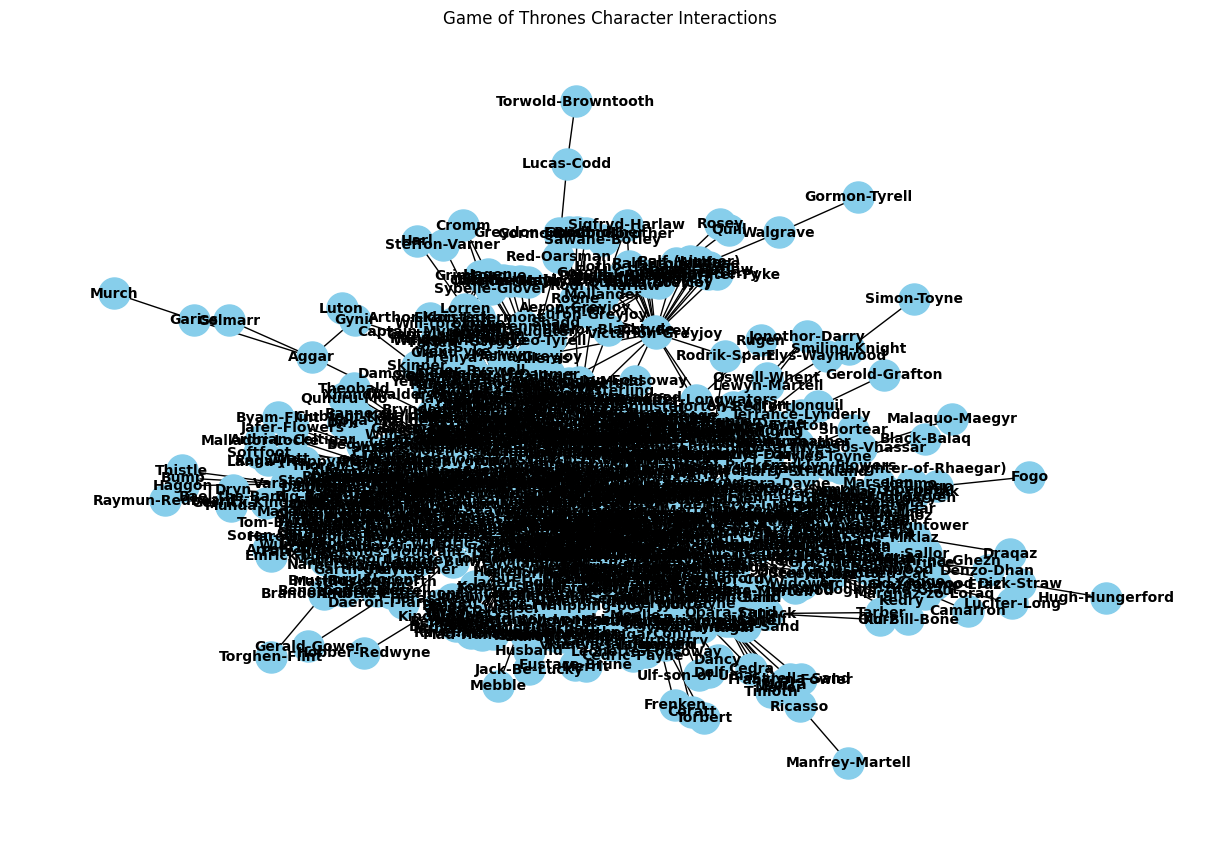

In [46]:
# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_weight='bold', font_size=10)
plt.title("Game of Thrones Character Interactions")
plt.show()

Find how many nodes the graph contains **(5 marks)**

In [50]:
# Calculate the number of nodes in the graph
num_nodes = G.number_of_nodes()

# Display the number of nodes
print("Number of nodes in the graph:", num_nodes)

Number of nodes in the graph: 796


Compute PageRank, sort the results and print out the first 5 results **(20 marks)**

In [48]:
# Compute PageRank
pagerank = nx.pagerank(G)

# Sort the results by PageRank values
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

# Print the first 5 nodes with highest PageRank
print("Top 5 nodes by PageRank:")
for node, rank in sorted_pagerank[:5]:
    print(f"Node: {node}, PageRank: {rank}")

Top 5 nodes by PageRank:
Node: Jon-Snow, PageRank: 0.01899956924856686
Node: Tyrion-Lannister, PageRank: 0.01834123261931105
Node: Jaime-Lannister, PageRank: 0.015437447356269758
Node: Stannis-Baratheon, PageRank: 0.01364881078118676
Node: Arya-Stark, PageRank: 0.01343205011523126


Compute Betweenness Centrality. Sort the results and print out the first 5 results. **(20 marks)**

In [49]:
# Compute Betweenness Centrality
betweenness = nx.betweenness_centrality(G)

# Sort the results by Betweenness Centrality values
sorted_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)

# Print the first 5 nodes with highest Betweenness Centrality
print("Top 5 nodes by Betweenness Centrality:")
for node, centrality in sorted_betweenness[:5]:
    print(f"Node: {node}, Betweenness Centrality: {centrality}")

Top 5 nodes by Betweenness Centrality:
Node: Jon-Snow, Betweenness Centrality: 0.19211961968354516
Node: Tyrion-Lannister, Betweenness Centrality: 0.16219109611159824
Node: Daenerys-Targaryen, Betweenness Centrality: 0.11841801916269201
Node: Theon-Greyjoy, Betweenness Centrality: 0.11128331813470249
Node: Stannis-Baratheon, Betweenness Centrality: 0.11013955266679575


Now switch to the Neo4j sandbox (or your desktop version) and access the database through the browser. Query directly the database using Cypher to find out the following:

1. Count the number of edges. **(10 marks)**
2. Display the graph based on the relationships of the character with the highest PageRank (from above). **(20 marks)**
3. Degree centrality is simply the number of connections that a node has in the network. In this context the degree centrality of a character is simply the number of other characters that interacted with it. Compute the degree centrality by considering **only** the **INTERACTIONS2** relation. **(20 marks)**

**Add the Cypher queries below:**

Cypher query (1)


In [ ]:
MATCH ()-[r]->()
RETURN COUNT(r) AS numberOfEdges

Cypher query (2)

In [ ]:
MATCH (c1:Character {name: 'Jon-Snow'})-[r]->(c2)
RETURN c1, r, c2


Cypher query (3)

In [ ]:
MATCH (c:Character)-[:INTERACTS2]->(other:Character)
WITH c, COUNT(other) AS degreeCentrality
RETURN c.name AS character, degreeCentrality
ORDER BY degreeCentrality DESC

#### References

1. Further information to how to use Neo4j from Python: https://neo4j.com/developer/python/